In [4]:
pip install sdv

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install table_evaluator

Note: you may need to restart the kernel to use updated packages.


In [6]:
import pandas as pd
data=pd.read_csv("/Users/akshatt/Downloads/Data.csv")

In [7]:
data

,Sex,Age_category,Highest_education_level
0,2,2,2
1,1,2,3
2,2,1,2
3,2,2,3
4,1,2,2
...,...,...,...
195,2,1,1
196,1,2,2
197,2,1,3
198,1,1,0


In [65]:


def plot_data(df):
    # Get column names
    columns = df.columns
    
    # Determine the number of rows and columns for subplots
    num_cols = 3
    num_rows = len(columns) // num_cols
    if len(columns) % num_cols != 0:
        num_rows += 1
    
    # Create subplots
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))
    
    # Flatten axes if necessary
    if num_rows == 1:
        axes = axes.reshape(1, -1)
    
    # Plot pie charts for each column
    for i, col in enumerate(columns):
        row_idx = i // num_cols
        col_idx = i % num_cols
        ax = axes[row_idx][col_idx]
        
        # Calculate value counts for the column
        counts = df[col].value_counts(normalize=True)
        
        # Plot pie chart
        ax.pie(counts, labels=counts.keys(), autopct='%1.1f%%', startangle=140)
        ax.set_title(col)
    
    # Adjust layout
    plt.tight_layout()
    plt.show()

# Example usage:
# Assuming df is your DataFrame
# plot_data(df)
def plot_mean_std(real: pd.DataFrame, fake: pd.DataFrame, ax=None, fname=None):
    """
    Plot the means and standard deviations of each dataset.

    :param real: DataFrame containing the real data
    :param fake: DataFrame containing the fake data
    :param ax: Axis to plot on. If none, a new figure is made.
    :param fname: If not none, saves the plot with this file name.
    """
    if ax is None:
        fig, ax = plt.subplots(1, 2, figsize=(10, 5))
        fig.suptitle('Absolute Log Mean and STDs of numeric data\n', fontsize=16)

    ax[0].grid(True)
    ax[1].grid(True)
    real = real.select_dtypes(include='number')
    fake = fake.select_dtypes(include='number')
    real_mean = np.log(np.add(abs(real.mean()).values, 1e-5))
    fake_mean = np.log(np.add(abs(fake.mean()).values, 1e-5))
    min_mean = min(real_mean) - 1
    max_mean = max(real_mean) + 1
    line = np.arange(min_mean, max_mean)
    sns.lineplot(x=line, y=line, ax=ax[0])
    sns.scatterplot(x=real_mean,
                    y=fake_mean,
                    ax=ax[0])
    ax[0].set_title('Means of real and fake data')
    ax[0].set_xlabel('real data mean (log)')
    ax[0].set_ylabel('fake data mean (log)')

    real_std = np.log(np.add(real.std().values, 1e-5))
    fake_std = np.log(np.add(fake.std().values, 1e-5))
    min_std = min(real_std) - 1
    max_std = max(real_std) + 1
    line = np.arange(min_std, max_std)
    sns.lineplot(x=line, y=line, ax=ax[1])
    sns.scatterplot(x=real_std,
                    y=fake_std,
                    ax=ax[1])
    ax[1].set_title('Stds of real and fake data')
    ax[1].set_xlabel('real data std (log)')
    ax[1].set_ylabel('fake data std (log)')

    if fname is not None:
        plt.savefig(fname)

    if ax is None:
        plt.show()


In [8]:
categorical_features=["Sex","Age_category","Highest_education_level"]
desired_frequencies = {
    'Sex':{1: 25324, 2: 24676},
    'Age_category':{1: 17955, 2: 29642, 3: 2403},
    'Highest_education_level':{0: 7490, 1: 5655, 2: 24400, 3: 12455}
}

In [37]:
from ctgan import CTGAN
model=CTGAN(verbose=True)
model.fit(data,categorical_features)
synthetic_data=model.sample(50000)

Gen. (0.04) | Discrim. (-0.03): 100%|██████████| 300/300 [00:09<00:00, 32.29it/s] 


In [38]:
synthetic_data

,Sex,Age_category,Highest_education_level
0,1,1,2
1,2,2,0
2,1,2,1
3,2,1,3
4,2,1,3
...,...,...,...
49995,1,1,3
49996,1,1,3
49997,1,1,2
49998,2,1,3


In [43]:
synthetic_data.isnull().values.any()

False

                              Sex  Age_category  Highest_education_level
Sex                      1.000000      0.035787                -0.017279
Age_category             0.035787      1.000000                -0.013230
Highest_education_level -0.017279     -0.013230                 1.000000


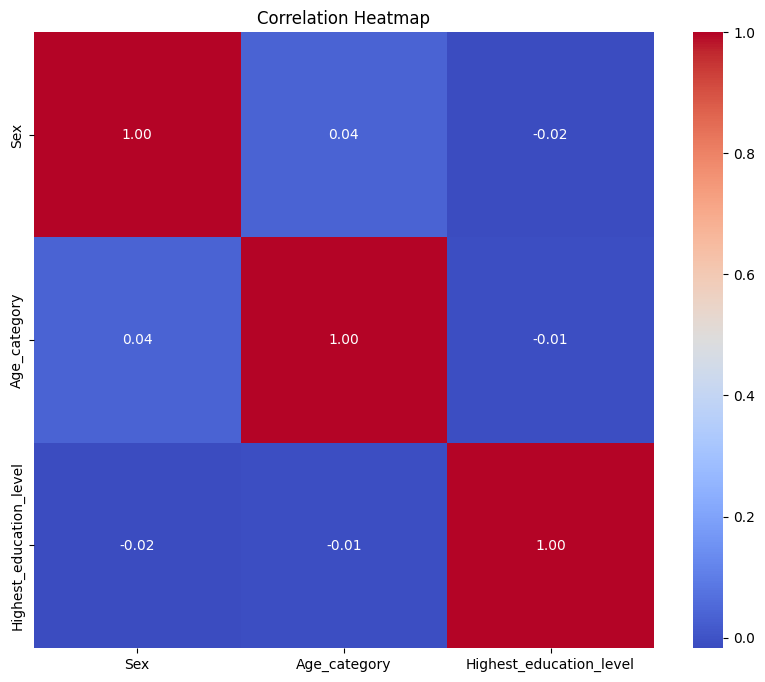

                              Sex  Age_category  Highest_education_level
Sex                      1.000000     -0.015917                -0.069140
Age_category            -0.015917      1.000000                 0.239223
Highest_education_level -0.069140      0.239223                 1.000000


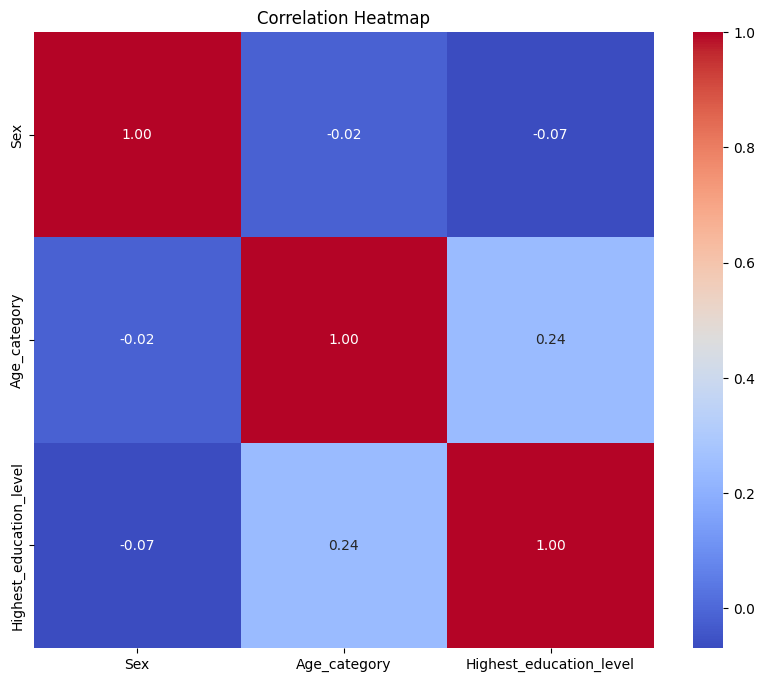

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt
correlation_matrix = synthetic_data.corr()
print(correlation_matrix)
# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()
correlation_matrix = data.corr()
print(correlation_matrix)
# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

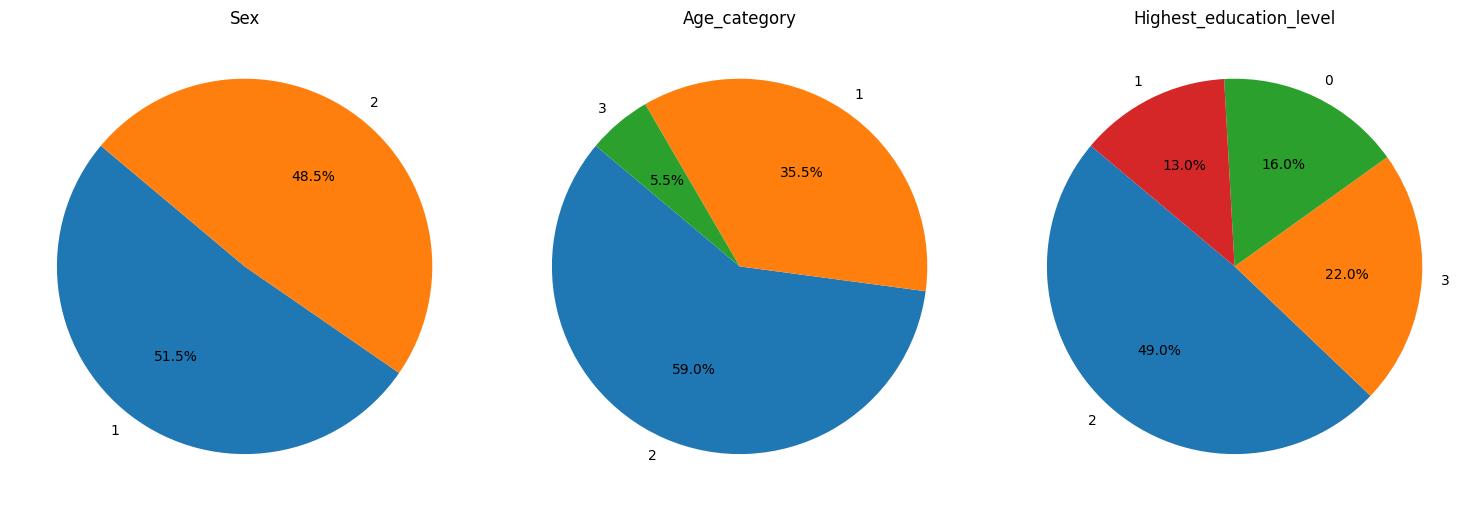

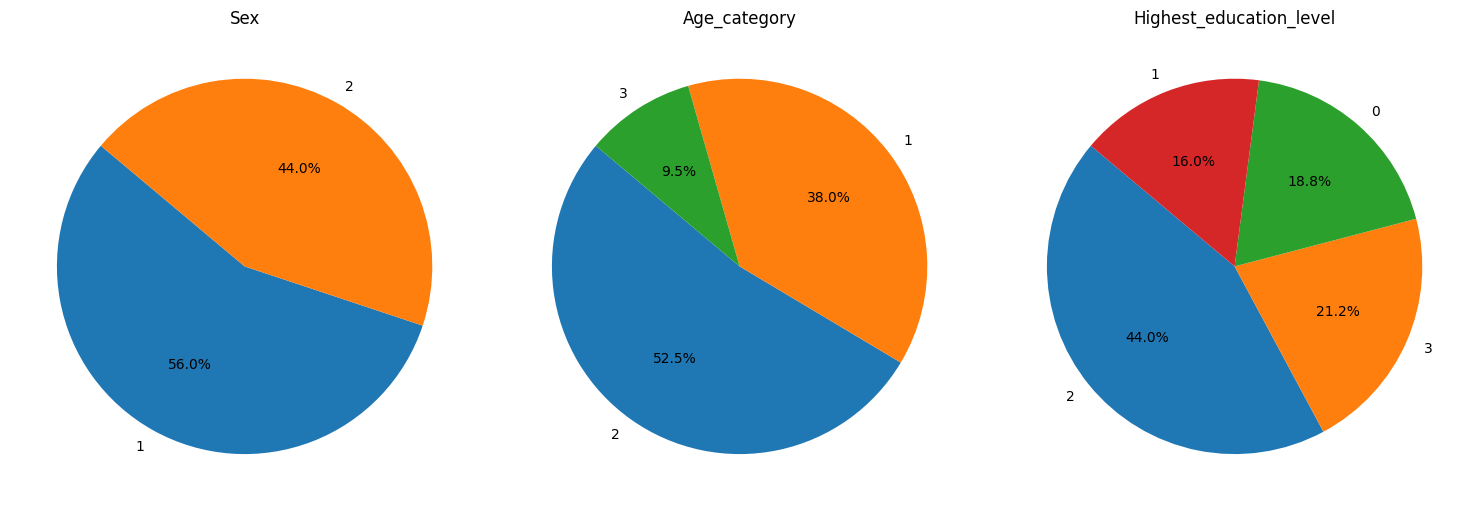

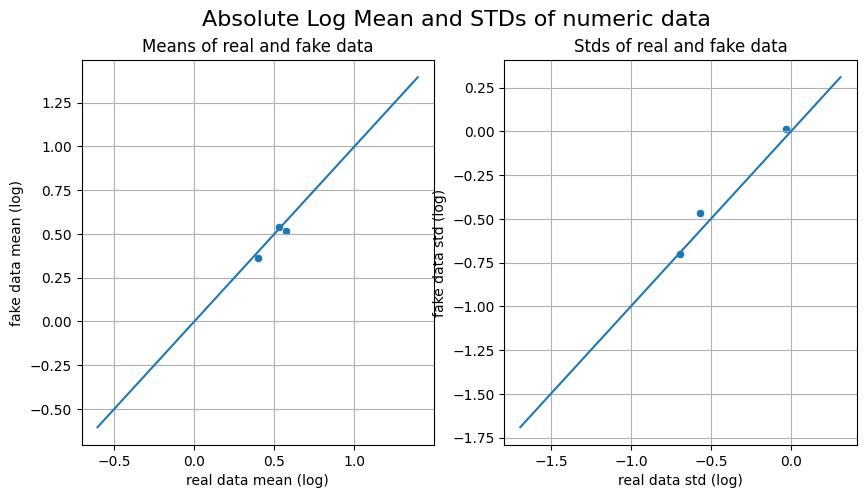

In [67]:
plot_data(data)
plot_data(synthetic_data)
plot_mean_std(data,synthetic_data)

In [14]:
from ctgan import CTGAN
model=CTGAN(verbose=True)
model.fit(synthetic_data,categorical_features)
synthetic_data1=model.sample(50000)

Gen. (-0.75) | Discrim. (-0.08): 100%|██████████| 300/300 [12:20<00:00,  2.47s/it]


                              Sex  Age_category  Highest_education_level
Sex                      1.000000     -0.133861                 0.058905
Age_category            -0.133861      1.000000                -0.116744
Highest_education_level  0.058905     -0.116744                 1.000000


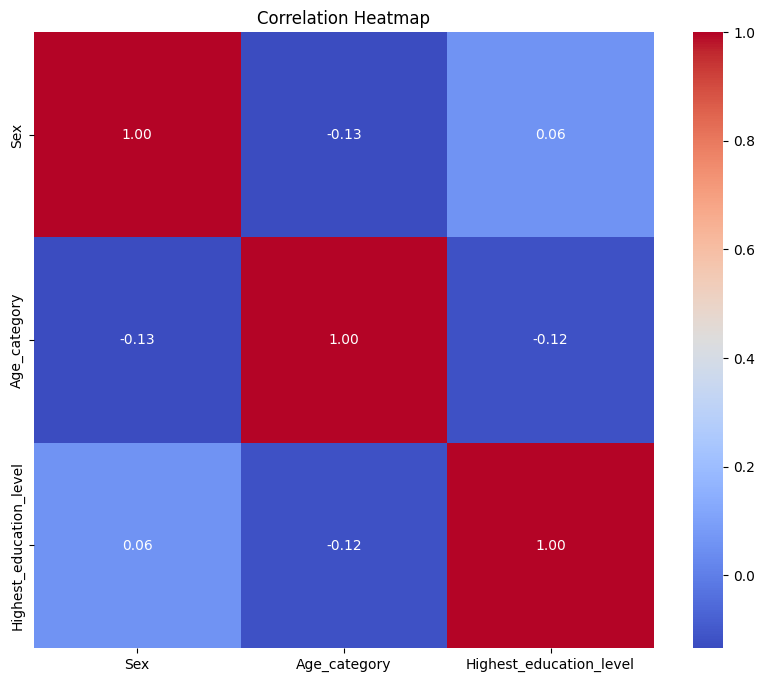

                              Sex  Age_category  Highest_education_level
Sex                      1.000000     -0.060611                 0.054814
Age_category            -0.060611      1.000000                 0.009179
Highest_education_level  0.054814      0.009179                 1.000000


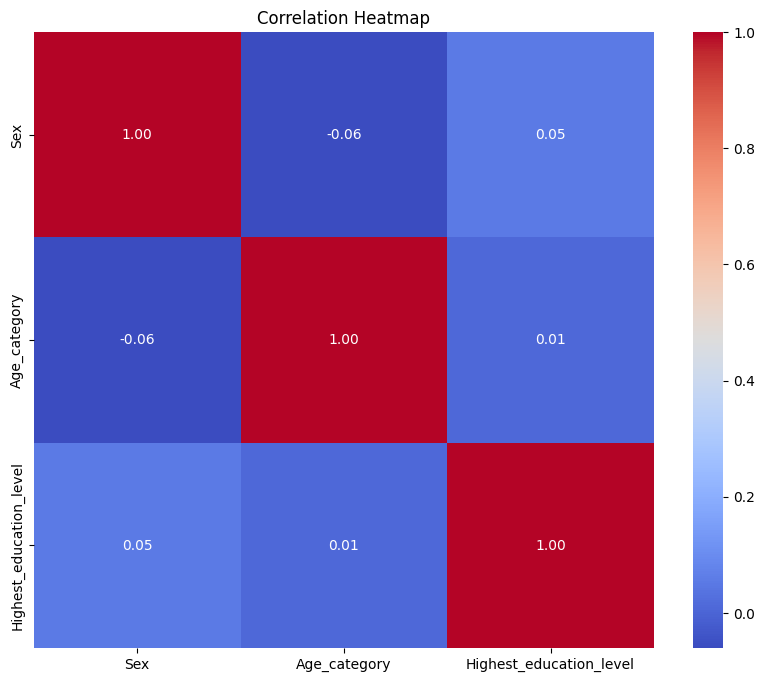

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
correlation_matrix = synthetic_data1.corr()
print(correlation_matrix)
# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()
correlation_matrix = synthetic_data.corr()
print(correlation_matrix)
# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

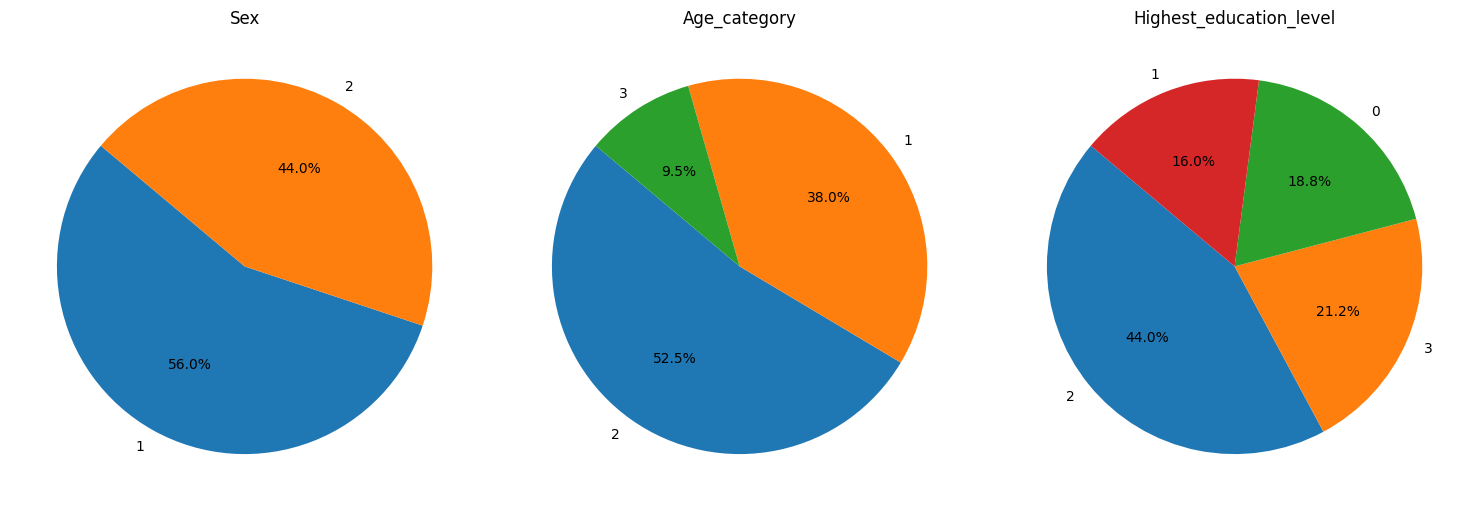

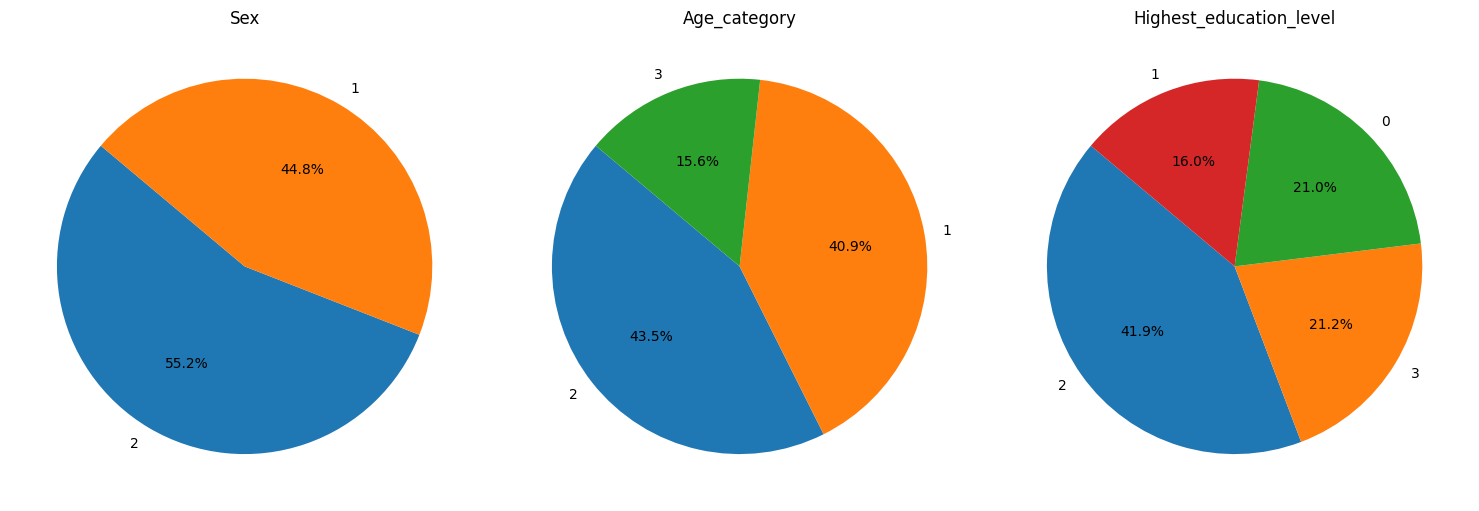

In [68]:
plot_data(synthetic_data)
plot_data(synthetic_data1)

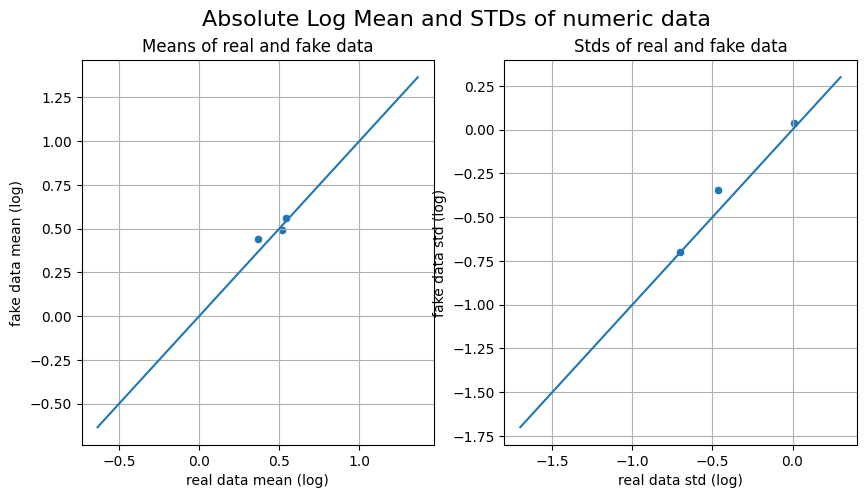

In [64]:
plot_mean_std(synthetic_data,synthetic_data1)

In [46]:
import numpy as np
import pandas as pd

# Assuming you have your original dataset in a DataFrame called original_data
# original_data should have 200 samples

original_data=data
correlation_matrix = original_data.corr()

# 2. Resample data to generate new datasets
num_samples_to_generate = 50000
num_original_samples = 200

synthesized_data = []

for _ in range(num_samples_to_generate):
    # Resample with replacement
    resampled_indices = np.random.choice(num_original_samples-1, 5, replace=True)

    resampled_data = original_data.iloc[resampled_indices]
    
    # Ensure the correlation structure remains the same
    resampled_correlation_matrix = resampled_data.corr()
    # Adjust resampled data to match original correlation
    # You can use methods like Cholesky decomposition or other techniques to adjust covariance
    # Here, we'll use a simplified approach of scaling by the original correlation
    scaled_resampled_data = resampled_data.copy()
    for column in original_data.columns:
        scaled_resampled_data[column] = resampled_data[column] * np.sqrt(correlation_matrix.loc[column, column] / resampled_correlation_matrix.loc[column, column])
    
    synthesized_data.append(scaled_resampled_data)

# Concatenate synthesized datasets
synthesized_data = pd.concat(synthesized_data, ignore_index=True)

# 4. Verify correlation
synthesized_correlation_matrix = synthesized_data.corr()
print("Original Correlation Matrix:")
print(correlation_matrix)
print("\nSynthesized Correlation Matrix:")
print(synthesized_correlation_matrix)


Original Correlation Matrix:
                              Sex  Age_category  Highest_education_level
Sex                      1.000000     -0.015917                -0.069140
Age_category            -0.015917      1.000000                 0.239223
Highest_education_level -0.069140      0.239223                 1.000000

Synthesized Correlation Matrix:
                              Sex  Age_category  Highest_education_level
Sex                      1.000000     -0.022126                -0.075675
Age_category            -0.022126      1.000000                 0.235074
Highest_education_level -0.075675      0.235074                 1.000000


In [52]:
synthesized_data

,Sex,Age_category,Highest_education_level
0,2.0,1.0,1.0
1,2.0,2.0,0.0
2,2.0,2.0,2.0
3,2.0,1.0,1.0
4,1.0,1.0,2.0
...,...,...,...
249995,1.0,1.0,1.0
249996,1.0,2.0,3.0
249997,2.0,2.0,1.0
249998,1.0,2.0,1.0


In [18]:

from ctgan import CTGAN
import pandas as pd

# Assuming you have your original dataset in a DataFrame called original_data
# original_data should contain both categorical and continuous variables

# 1. Prepare Data
# Assuming your original_data is already prepared

# 2. Fit CTGAN Model
ctgan_model = CTGAN(verbose=True)
ctgan_model.fit(synthesized_data,categorical_features)

# 3. Generate Synthetic Data
num_samples_to_generate = 50000
synthetic_data = ctgan_model.sample(num_samples_to_generate)

# 4. Validation
# Compute correlation matrix of original data
original_correlation_matrix = original_data.corr()

# Compute correlation matrix of synthetic data
synthetic_correlation_matrix = synthetic_data.corr()

print("Original Correlation Matrix:")
print(original_correlation_matrix)
print("\nSynthetic Correlation Matrix:")
print(synthetic_correlation_matrix)


Gen. (-0.42) | Discrim. (0.38): 100%|██████████| 300/300 [1:17:35<00:00, 15.52s/it]  


Original Correlation Matrix:
                              Sex  Age_category  Highest_education_level
Sex                      1.000000     -0.015917                -0.069140
Age_category            -0.015917      1.000000                 0.239223
Highest_education_level -0.069140      0.239223                 1.000000

Synthetic Correlation Matrix:
                              Sex  Age_category  Highest_education_level
Sex                      1.000000      0.084173                -0.023642
Age_category             0.084173      1.000000                 0.158413
Highest_education_level -0.023642      0.158413                 1.000000


                              Sex  Age_category  Highest_education_level
Sex                      1.000000     -0.019934                -0.068754
Age_category            -0.019934      1.000000                 0.236909
Highest_education_level -0.068754      0.236909                 1.000000


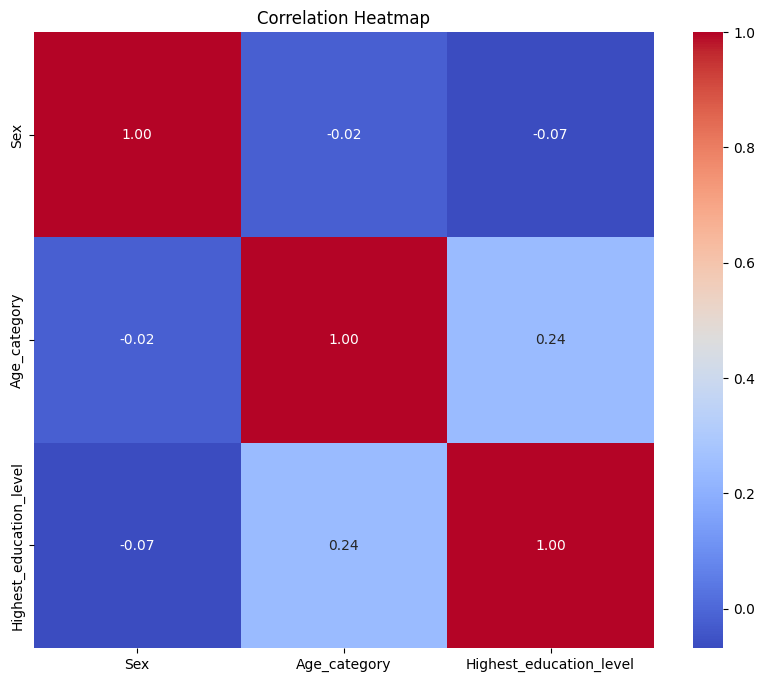

                              Sex  Age_category  Highest_education_level
Sex                      1.000000      0.084173                -0.023642
Age_category             0.084173      1.000000                 0.158413
Highest_education_level -0.023642      0.158413                 1.000000


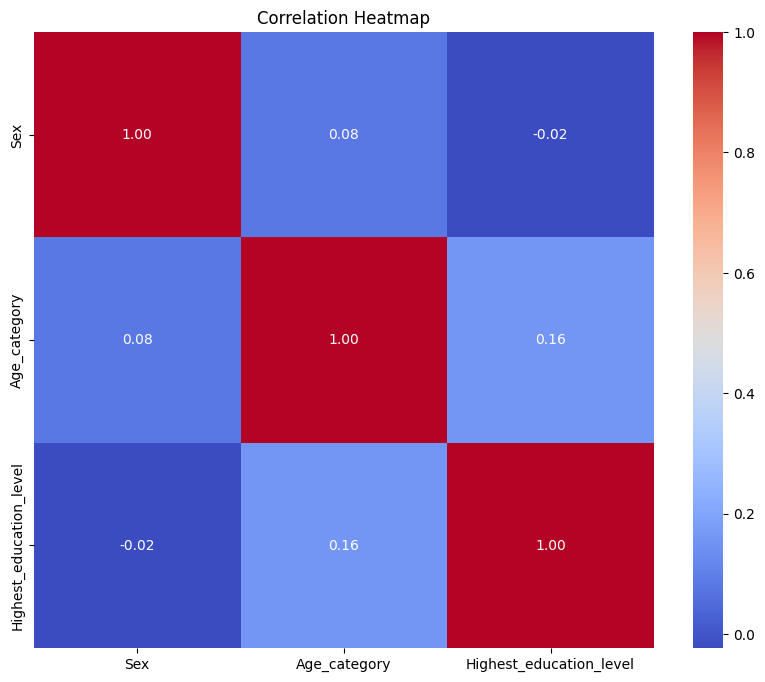

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
correlation_matrix = synthesized_data.corr()
print(correlation_matrix)
# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()
correlation_matrix = synthetic_data.corr()
print(correlation_matrix)
# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

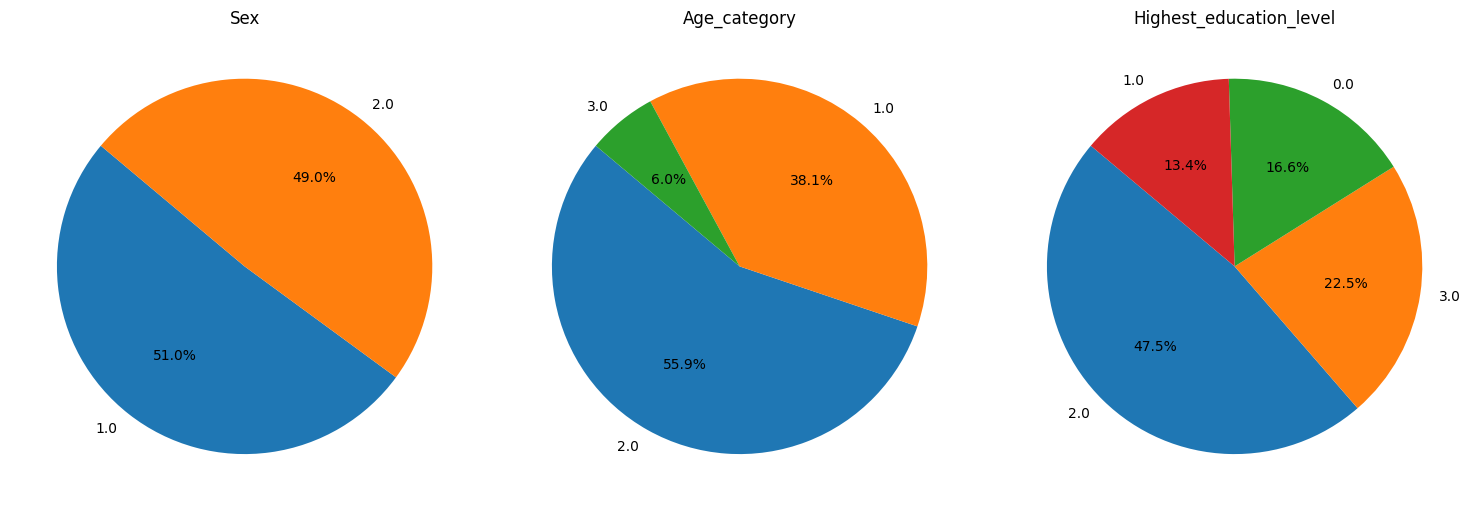

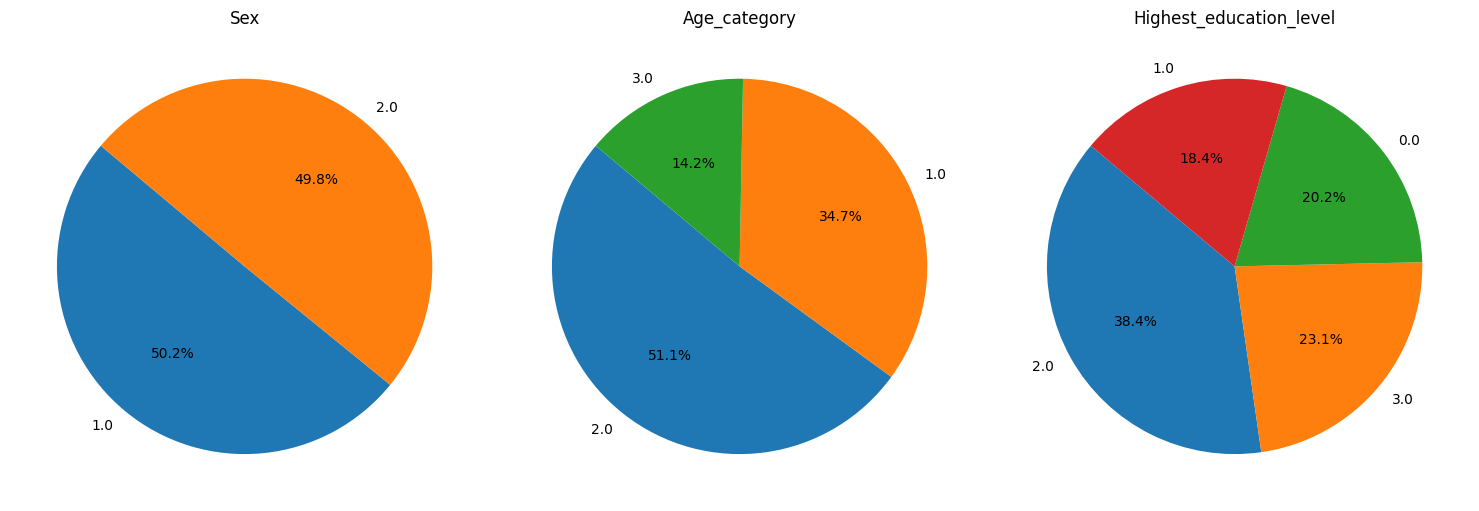

In [20]:
plot_data(synthesized_data)
plot_data(synthetic_data)

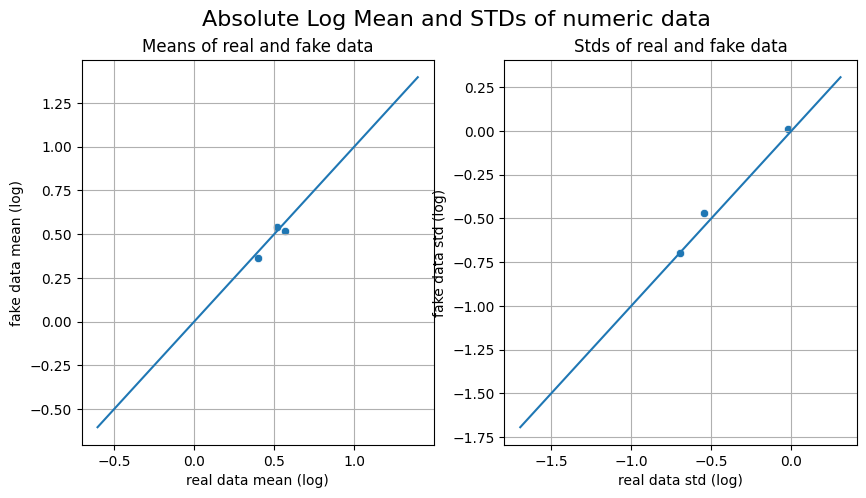

In [63]:
plot_mean_std(synthesized_data,synthetic_data)

(200, 3) (50000, 3)


ValueError: min() arg is an empty sequence

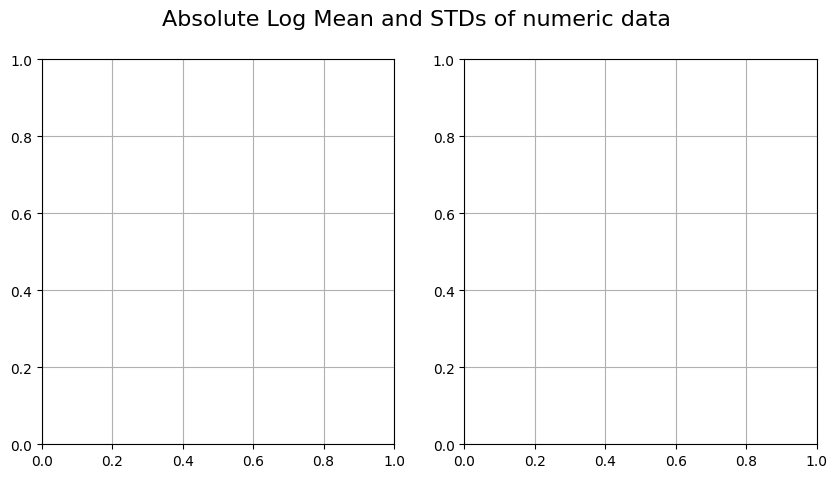

In [59]:
from table_evaluator import TableEvaluator

print(data.shape, synthetic_data.shape)
table_evaluator =  TableEvaluator(synthetic_data.interpolate(), synthesized_data.interpolate(), cat_cols= categorical_features)

table_evaluator.visual_evaluation()

In [ ]:
from sdv.sampling import Condition
conditon=[Condition(column_values={'Sex':1},num_rows=25324),
Condition(column_values={'Sex':2},num_rows=24676),
Condition(column_values={'Age_category':1},num_rows=17955),
Condition(column_values={'Age_category':2},num_rows=29642),
Condition(column_values={'Age_category':3},num_rows=2403),
Condition(column_values={'Highest_education_level':0},num_rows=7490),
Condition(column_values={'Highest_education_level':1},num_rows=5655),
Condition(column_values={'Highest_education_level':2},num_rows=24400),
Condition(column_values={'Highest_education_level':3},num_rows=12455)]